10) This question should be answered using the weekly data set.  It contains 1089 weekly returns for 21 years from the beginning of 1990 to the end of 2010.

a) Produce some numerical and graphical summaries of the weekly data.  Describe any patterns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
direct = os.getcwd()
weekly = pd.read_csv(os.path.join(direct, 'weekly.csv'))

In [3]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [4]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


Standard Deviations are similar for the lags and today.  The values for lags and today are all the same, with the exception of the beginning and end (up to 5 rows max).

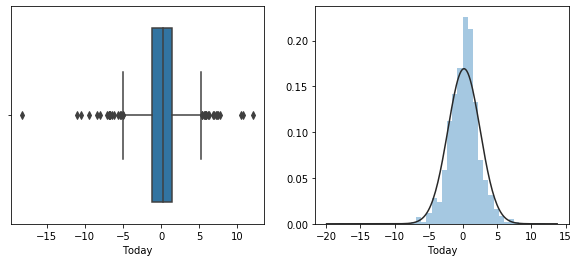

In [5]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x=weekly['Today']);

ax2 = fig.add_subplot(1,2,2)
sns.distplot(weekly['Today'], kde=False, bins=40, fit=stats.norm);

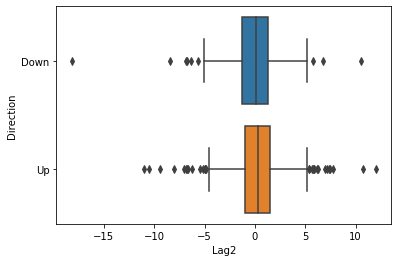

In [6]:
sns.boxplot(x=weekly['Lag2'], y=weekly['Direction']);

Distribution is not quite normal, but close, has many outliers, high and low.  No discernible pattern between up or down.

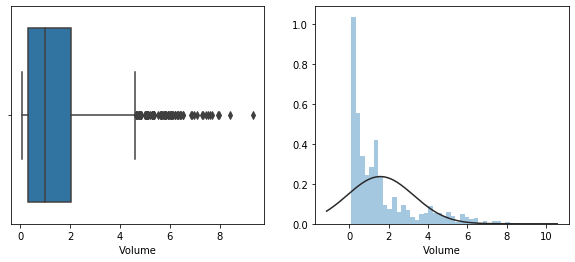

In [7]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x=weekly['Volume']);

ax2 = fig.add_subplot(1,2,2)
sns.distplot(weekly['Volume'], kde=False, bins=40, fit=stats.norm);

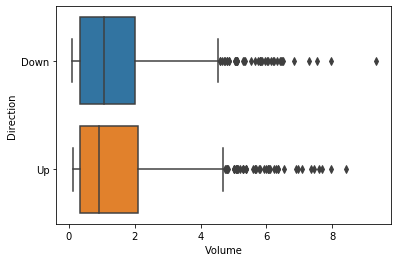

In [8]:
sns.boxplot(x=weekly['Volume'], y=weekly['Direction']);

Distribution not normal, skewed, outliers to the high side.  No discernible pattern between up or down.

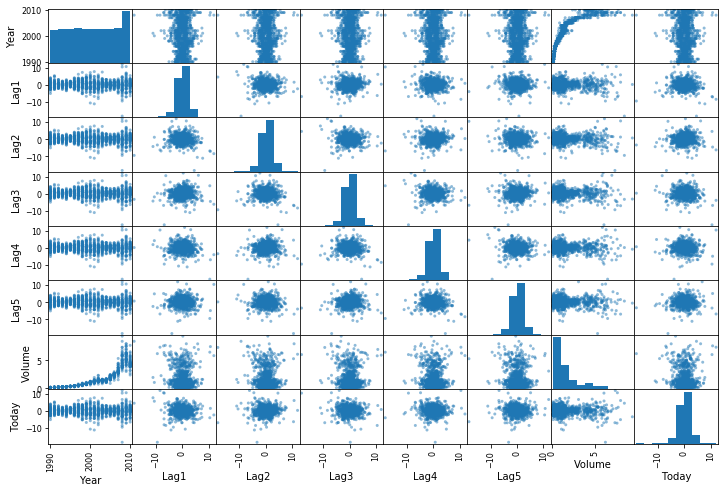

In [9]:
pd.plotting.scatter_matrix(weekly, figsize=(12,8));

Volume has increased, exponentially, over time, and larger standard deviation in more recent times.  No discernible pattern with any other variables.

In [10]:
weekly.iloc[:,1:].corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Very little correlation between any value variable

b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus volume as predictors.  Use the summary functin to print the results.  Are any predictors significant?

In [11]:
weekly['Direction_IO'] = weekly['Direction'].apply(lambda x: 1 if x=='Up' else 0)
y = weekly['Direction_IO']
x = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]

In [12]:
model = sm.Logit(y, sm.add_constant(x)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_IO   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                0.006580
Time:                        15:24:06   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Lag2 looks to be the only significant predictor

c) Compute the confusion matrix and overall accuracy.  What does the confusion matrix say?

In [13]:
preds = model.predict(sm.add_constant(x))
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y, probs['Predicted']), axis=1)

In [14]:
def errorType(row, var):
    actual = row[var]
    pred = row['Predicted']
    if pred == 1:
        #positive
        if actual == pred:
            return 'TP'
        else:
            return 'FP'
    else:
        #negative
        if actual == pred:
            return 'TN'
        else:
            return 'FN'

In [15]:
forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'Direction_IO'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((forMatrix['Direction_IO'].sum()/total)*100))

counts

Accuracy:  56.11%
FP rate:  39.49%
FN rate:  4.41%
Benchmark:  55.56%


TP    557
FP    430
TN     54
FN     48
Name: ERROR, dtype: int64

****Answer:**** This model is slightly better than assuming every day is an Up day (benchmark), but incorrectly predicts an up day a large portion of the time. (FPR).  This tells me the model might be biased toward up days.

d)  Fit the logistic model using a trianing data period from 1990 to 2008 using only Lag2 as the predictor.  Compute the confuson matrix and accuracy for the held out data.

In [16]:
train = weekly.loc[weekly['Year'] <= 2008]
train_y = train['Direction_IO']
train_x = train[['Lag2']]

test = weekly.loc[weekly['Year'] > 2008]
test_y = test['Direction_IO']
test_x = test[['Lag2']]

In [17]:
model = sm.Logit(train_y, sm.add_constant(train_x)).fit()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


In [18]:
preds = model.predict(sm.add_constant(test_x))
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((test_y, probs['Predicted']), axis=1)

In [19]:
forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'Direction_IO'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((train_y.sum()/len(train_y))*100))

counts

Accuracy:  62.50%
FP rate:  32.69%
FN rate:  4.81%
Benchmark:  55.23%


TP    56
FP    34
TN     9
FN     5
Name: ERROR, dtype: int64

This model is slightly better than the model using all variables.

e) repeat d using LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(train_x, train_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [21]:
preds = model.predict(test_x)
predictions = pd.DataFrame(preds, columns=['Predicted'])
test_y.reset_index(drop=True, inplace=True)
forMatrix = pd.concat((test_y, predictions), axis=1)

In [22]:
forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'Direction_IO'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((train_y.sum()/len(train_y))*100))

counts

Accuracy:  62.50%
FP rate:  32.69%
FN rate:  4.81%
Benchmark:  55.23%


TP    56
FP    34
TN     9
FN     5
Name: ERROR, dtype: int64

f) repeat d using QDA

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(train_x, train_y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [24]:
preds = model.predict(test_x)
predictions = pd.DataFrame(preds, columns=['Predicted'])
test_y.reset_index(drop=True, inplace=True)
forMatrix = pd.concat((test_y, predictions), axis=1)
forMatrix['Predicted'].unique()

array([1], dtype=int64)

In [25]:
forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'Direction_IO'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('Benchmark:  {:.2f}%'.format((train_y.sum()/len(train_y))*100))

counts

Accuracy:  58.65%
FP rate:  41.35%
Benchmark:  55.23%


TP    61
FP    43
Name: ERROR, dtype: int64

g) repead d using KNN with K=1

In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(n_neighbors=1)
model.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
preds = model.predict(test_x)
predictions = pd.DataFrame(preds, columns=['Predicted'])
test_y.reset_index(drop=True, inplace=True)
forMatrix = pd.concat((test_y, predictions), axis=1)

In [28]:
forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'Direction_IO'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((train_y.sum()/len(train_y))*100))

counts

Accuracy:  49.04%
FP rate:  21.15%
FN rate:  29.81%
Benchmark:  55.23%


FN    31
TP    30
FP    22
TN    21
Name: ERROR, dtype: int64

h) Which method appears to do the best?
****Answer:**** The logistic regression or LDA performed the best.  Understandable because the distribution of the predictor was very close to normal.

***
11)  In this problem, develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above the median, and a 0 if below.

In [29]:
auto = pd.read_csv(os.path.join(direct, 'Auto.csv'))

In [30]:
median = auto['mpg'].describe()['50%']
auto['mpg01'] = auto['mpg'].apply(lambda x: 1 if x >= median else 0)

b) Explore the data graphically, which seems to be most useful for prediction?

In [31]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
mpg01           397 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 31.1+ KB


In [32]:
auto['remove'] = auto['horsepower'].apply(lambda x: 1 if x=='?' else 0)
auto = auto.loc[auto['remove'] == 0]
auto.drop(columns=['remove'], inplace=True)
auto2 = auto['horsepower'].astype('float64')

In [33]:
auto3 = pd.concat((auto[['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'name', 'mpg01']], auto2), axis=1)
auto = auto3

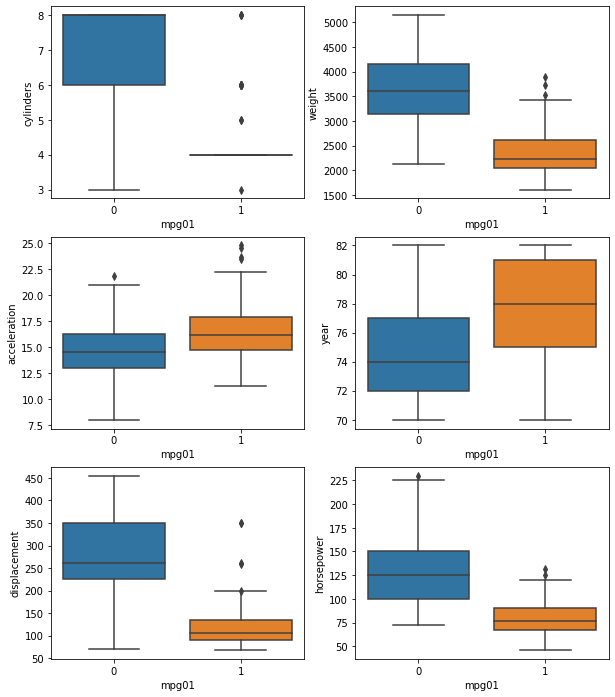

In [34]:
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(3,2,1)
sns.boxplot(x = auto['mpg01'], y = auto['cylinders']);

ax2 = fig.add_subplot(3,2,2)
sns.boxplot(x = auto['mpg01'], y = auto['weight']);

ax3 = fig.add_subplot(3,2,3)
sns.boxplot(x = auto['mpg01'], y = auto['acceleration']);

ax4 = fig.add_subplot(3,2,4)
sns.boxplot(x = auto['mpg01'], y = auto['year']);

ax5 = fig.add_subplot(3,2,5)
sns.boxplot(x = auto['mpg01'], y = auto['displacement']);

ax6 = fig.add_subplot(3,2,6)
sns.boxplot(x = auto['mpg01'], y = auto['horsepower']);

In [35]:
auto.corr()

,cylinders,displacement,weight,acceleration,year,origin,mpg01,horsepower
cylinders,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932,-0.759194,0.842983
displacement,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535,-0.753477,0.897257
weight,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005,-0.757757,0.864538
acceleration,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746,0.346822,-0.689196
year,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528,0.429904,-0.416361
origin,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000,0.513698,-0.455171
mpg01,-0.759194,-0.753477,-0.757757,0.346822,0.429904,0.513698,1.000000,-0.667053
horsepower,0.842983,0.897257,0.864538,-0.689196,-0.416361,-0.455171,-0.667053,1.000000


****Answer:**** The variables used in the boxplots above seem like they will be useful, however, cylinders, displacement, weight, and horsepower are all very correlated.  Using all may cause issues.

c) Split the data into test and training sets

In [36]:
from sklearn.model_selection import train_test_split as tts
x_cols = ['displacement', 'acceleration', 'year']
x_train, x_test, y_train, y_test = tts(auto[x_cols], auto['mpg01'], test_size = 0.5, random_state=1)

d) Perform LDA on the training data to predict mpg01 using variables that seemed the most useful in b.  What is the test error rate?

In [37]:
model = LDA()
model.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [38]:
preds = model.predict(x_test)
predictions = pd.DataFrame(preds, columns=['Predicted'])
y_test.reset_index(drop=True, inplace=True)
forMatrix = pd.concat((y_test, predictions), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  87.76%
FP rate:  9.69%
FN rate:  2.55%
Benchmark:  53.57%


TP    86
TN    86
FP    19
FN     5
Name: ERROR, dtype: int64

****Answer:**** The test error rate is 12.24%

e) Perform QDA

In [39]:
model = QDA()
model.fit(x_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [40]:
preds = model.predict(x_test)
predictions = pd.DataFrame(preds, columns=['Predicted'])
y_test.reset_index(drop=True, inplace=True)
forMatrix = pd.concat((y_test, predictions), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  89.29%
FP rate:  8.16%
FN rate:  2.55%
Benchmark:  53.57%


TN    89
TP    86
FP    16
FN     5
Name: ERROR, dtype: int64

****Answer:**** The test error rate is 10.71%, better than LDA)

f) Perform logistic regression

In [41]:
model = sm.Logit(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.240687
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  196
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.6515
Time:                        15:24:10   Log-Likelihood:                -47.175
converged:                       True   LL-Null:                       -135.36
Covariance Type:            nonrobust   LLR p-value:                 5.380e-38
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.4949      6.613     -2.797      0.005     -31.457      -5.533
displacement    -0.0399

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
preds = model.predict(sm.add_constant(x_test))
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y_test, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  20.07%
FP rate:  26.19%
FN rate:  53.74%
Benchmark:  53.57%


FN    158
FP     77
TN     38
TP     21
Name: ERROR, dtype: int64

****Answer:**** The test error rate is very high

g) Perform KNN on the data, using multiple values of K.  Which value of K seems to perform the best?

In [43]:
model = KNN(n_neighbors=5)
model.fit(x_train, y_train)

preds = model.predict(x_test)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y_test, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  90.31%
FP rate:  6.63%
FN rate:  3.06%
Benchmark:  53.57%


TN    92
TP    85
FP    13
FN     6
Name: ERROR, dtype: int64

In [44]:
model = KNN(n_neighbors=10)
model.fit(x_train, y_train)

preds = model.predict(x_test)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y_test, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  90.31%
FP rate:  7.14%
FN rate:  2.55%
Benchmark:  53.57%


TN    91
TP    86
FP    14
FN     5
Name: ERROR, dtype: int64

In [45]:
model = KNN(n_neighbors=20)
model.fit(x_train, y_train)

preds = model.predict(x_test)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y_test, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  89.29%
FP rate:  8.16%
FN rate:  2.55%
Benchmark:  53.57%


TN    89
TP    86
FP    16
FN     5
Name: ERROR, dtype: int64

In [46]:
model = KNN(n_neighbors=50)
model.fit(x_train, y_train)

preds = model.predict(x_test)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y_test, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  89.29%
FP rate:  8.16%
FN rate:  2.55%
Benchmark:  53.57%


TN    89
TP    86
FP    16
FN     5
Name: ERROR, dtype: int64

In [47]:
model = KNN(n_neighbors=100)
model.fit(x_train, y_train)

preds = model.predict(x_test)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y_test, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'mpg01'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  87.24%
FP rate:  11.22%
FN rate:  1.53%
Benchmark:  53.57%


TP    88
TN    83
FP    22
FN     3
Name: ERROR, dtype: int64

****Answer:**** The best model seems to be K ~ 10

***
13) Use the Boston dataset and fit classification models in order to predict whether a given suburb has a crime rate above or below the median.  Explore logistic, LDA, and KNN models using various subsets of the predictors.  Describe the findings.

In [48]:
boston = pd.read_csv(os.path.join(direct, 'Boston.csv'))
median = boston['crim'].describe()['50%']
boston['crim_io'] = boston['crim'].apply(lambda x: 1 if x >= median else 0)
cols = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv']
x_train, x_test, y_train, y_test = tts(boston[cols], boston['crim_io'], test_size = 0.5, random_state=1)

In [49]:
x_cols = ['nox', 'age', 'rad', 'tax', 'ptratio', 'b', 'medv']
x = x_train[x_cols]

In [50]:
model = sm.Logit(y_train, sm.add_constant(x)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.183946
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                crim_io   No. Observations:                  253
Model:                          Logit   Df Residuals:                      245
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.7345
Time:                        15:24:10   Log-Likelihood:                -46.538
converged:                       True   LL-Null:                       -175.27
Covariance Type:            nonrobust   LLR p-value:                 7.143e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1115      9.472     -2.123      0.034     -38.677      -1.546
nox           38.6676      8

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
x = x_test[x_cols]
preds = model.predict(sm.add_constant(x))
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
forMatrix = pd.concat((y_test, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'crim_io'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  88.54%
FP rate:  5.53%
FN rate:  5.93%
Benchmark:  51.38%


TN    116
TP    108
FN     15
FP     14
Name: ERROR, dtype: int64

In [52]:
model = LDA()
x_cols = ['nox', 'rad', 'tax', 'ptratio']
model.fit(x_train[x_cols], y_train)

x = x_test[x_cols]
preds = model.predict(x)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
y = y_test.reset_index(drop=True)
forMatrix = pd.concat((y, probs['Predicted']), axis=1)


forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'crim_io'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  80.24%
FP rate:  3.16%
FN rate:  16.60%
Benchmark:  51.38%


TN    122
TP     81
FN     42
FP      8
Name: ERROR, dtype: int64

In [53]:
x_cols = ['nox', 'tax']
model = KNN(n_neighbors=5)
model.fit(x_train[x_cols], y_train)

x = x_test[x_cols]
preds = model.predict(x)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
y = y_test.reset_index(drop=True)
forMatrix = pd.concat((y, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'crim_io'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  94.07%
FP rate:  2.37%
FN rate:  3.56%
Benchmark:  51.38%


TN    124
TP    114
FN      9
FP      6
Name: ERROR, dtype: int64

In [54]:
x_cols = ['nox', 'tax']
model = KNN(n_neighbors=20)
model.fit(x_train[x_cols], y_train)

x = x_test[x_cols]
preds = model.predict(x)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
y = y_test.reset_index(drop=True)
forMatrix = pd.concat((y, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'crim_io'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  83.79%
FP rate:  10.28%
FN rate:  5.93%
Benchmark:  51.38%


TP    108
TN    104
FP     26
FN     15
Name: ERROR, dtype: int64

In [55]:
x_cols = ['nox', 'ptratio']
model = KNN(n_neighbors=10)
model.fit(x_train[x_cols], y_train)

x = x_test[x_cols]
preds = model.predict(x)
probs = pd.DataFrame(preds, columns=['Probabilities'])
probs['Predicted'] = probs['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
y = y_test.reset_index(drop=True)
forMatrix = pd.concat((y, probs['Predicted']), axis=1)

forMatrix['ERROR'] = forMatrix.apply(lambda x: errorType(x, 'crim_io'), axis=1)
counts = forMatrix['ERROR'].value_counts()

right = counts['TP'] + counts['TN']
total = len(forMatrix)
print('Accuracy:  {:.2f}%'.format((right/total)*100))
print('FP rate:  {:.2f}%'.format((counts['FP']/total)*100))
print('FN rate:  {:.2f}%'.format((counts['FN']/total)*100))
print('Benchmark:  {:.2f}%'.format((y_train.sum()/len(y_train))*100))

counts

Accuracy:  82.21%
FP rate:  9.49%
FN rate:  8.30%
Benchmark:  51.38%


TN    106
TP    102
FP     24
FN     21
Name: ERROR, dtype: int64

KNN classifier with nox and tax using K=5 was the best model, with a test error rate of 5.93% and very little bias (similar FPR and FNR).  Logistic regression performed the next best with a test error rate of 11.46%, (backward selection with threshold of 0.05 was used).  The worst performing was LDA, with a test error rate of 19.76%.